# Python Programming Practice Exam

```
Scoring:
============
 0-11: fail (1),
12-14: pass (2),
15-17: satisfactory (3),
18-20: good (4),
21-24: excellent (5).
```

## Problem 1
<p style="text-align: right">(4 points)</p>

The `code` list contains positive integers and strings in an alternating fashion. Write a program that prepares a string from the list so that it
- repeats each string $n$ times where $n$ is the number before the string,
- then concatenates the repeated strings after each other.

Example: `[3, 'va', 2, 'bob'] => 'vavavabobbob'`.
The program should not only work for the given `code` list but also for arbitrary input of the same format. You can assume that the input contains an even number of elements and it is syntactically correct.

In [1]:
code = [10, 'foo', 2, 'bar', 3, 'WOO']

In [2]:
print(''.join([n * s for n, s in zip(code[::2], code[1::2])]))

foofoofoofoofoofoofoofoofoofoobarbarWOOWOOWOO


## Problem 2
<p style="text-align: right">(8 points)</p>

The `letters` object contains a table of lowercase letters. Each row is represented as a string, and the table is represented as a list of strings. Write a program that prints the column containing the most vowels! The program should not only work for the given `letters` object but also for arbitrary input of the same format.

In [3]:
letters = [
    'onceuponamidnig',
    'htdrearywhileip',
    'onderedweakandw',
    'earyovermanyaqu',
    'aintandcuriousv',
    'olumeofforgotte',
    'nlorewhileinodd',
    'ednearlynapping',
    'suddenlythereca',
    'meatappingasofs',
    'omeonegentlyrap',
    'pingrappingatmy',
    'chamberdoortiss',
    'omevisitorimutt',
    'eredtappingatmy'
]

In [4]:
# solution 1
nrows, ncols = len(letters), len(letters[0])
vowels = {'a', 'e', 'i', 'o', 'u'}
counters = [0] * ncols
for i in range(nrows):
    for j in range(ncols):
        if letters[i][j] in vowels:
            counters[j] += 1
            
k = max(enumerate(counters), key=lambda x: x[1])[0]
for i in range(nrows):
    print(letters[i][k])

u
e
r
o
a
e
e
a
e
a
n
r
b
i
t


In [5]:
# solution 2
import numpy as np
vowels = {'a', 'e', 'i', 'o', 'u'}
a = np.array([list(s) for s in letters])

smax = -1
for aj in a.T:
    s = sum(x in vowels for x in aj)
    if s > smax:
        smax = s
        col = aj

print(''.join(col))

ueroaeeaeanrbit


In [15]:
# solution 3
import numpy as np
vowels = ['a', 'e', 'i', 'o', 'u']
a = np.array([list(s) for s in letters])
k = np.in1d(a, vowels).reshape((len(a), -1)).sum(0).argmax()
print(''.join(a[:, k]))

ueroaeeaeanrbit


## Problem 3
<p style="text-align: right">(12 points)</p>

The text file [singapore.txt](singapore.txt) contains data about the population of Singapore, split by year, sex, ethnicity and age group. Write a program that reads the data, and then:

**(a)** Plots the total population per year.<br>
**(b)** Prints the percentage of ethnicities in 1957.<br>
**(c)** Prints the male/female ratio in 2019, among the citizens at least 65 years old.

In [7]:
import pandas as pd
names = ['year', 'sex', 'ethnicity', 'age_group', 'population']
df = pd.read_csv('singapore.txt', sep=';', skiprows=2, names=names, na_values='na')
df

,year,sex,ethnicity,age_group,population
0,1957,Male,Malays,0 - 4 Years,21743.0
1,1957,Male,Malays,5 - 9 Years,14451.0
2,1957,Male,Malays,10 - 14 Years,8393.0
3,1957,Male,Malays,15 - 19 Years,8528.0
4,1957,Male,Malays,20 - 24 Years,10556.0
...,...,...,...,...,...
9571,2019,Female,Other,70 - 74 Years,849.0
9572,2019,Female,Other,75 - 79 Years,490.0
9573,2019,Female,Other,80 - 84 Years,404.0
9574,2019,Female,Other,85 - 89 Years,264.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        9576 non-null   int64  
 1   sex         9576 non-null   object 
 2   ethnicity   9576 non-null   object 
 3   age_group   9576 non-null   object 
 4   population  8232 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 374.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9576.0,1988.000000,18.185192,1957.0,1972.0,1988.0,2004.0,2019.0
population,8232.0,20931.844266,31111.785520,20.0,1900.0,7517.5,21433.5,124778.0


<AxesSubplot:xlabel='year'>

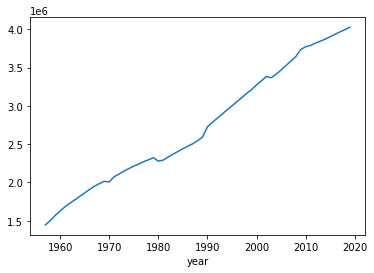

In [10]:
# (a) Plots the total population per year.
df.groupby('year')['population'].sum().plot()

In [11]:
# Prints the percentage of ethnicities in 1957.
se = df[df['year'] == 1957].groupby('ethnicity')['population'].sum()
se / se.sum() * 100

ethnicity
Chinese    75.432856
Indians     8.584120
Malays     13.619579
Other       2.363444
Name: population, dtype: float64

<AxesSubplot:ylabel='population'>

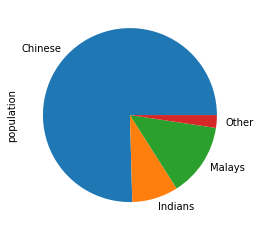

In [12]:
(se / se.sum() * 100).plot(kind='pie')

In [30]:
# (c) Prints the male/female ratio in 2019, among the citizens at least 65 years old.
se = df[(df['year'] == 2019) & (df['age_group'] >= '65')].groupby('sex')['population'].sum()
se['Male'] / se['Female']

0.8453495085878165